In [4]:
import uproot
import awkward as ak
import vector
import numpy as np

In [10]:
directory = "/Users/archiebrooks/Documents/Uni/mphys project/"

truth = uproot.open(directory + "4tops_skimmed_14nov.root:Truth")
reco = uproot.open(directory + "4tops_skimmed_14nov.root:Reco")

truth_hadronic = ak.count_nonzero(abs(truth["W_decay_id"].array())<6,axis=1)==8

reco_hadronic = (ak.count(reco["el_pt"].array(),axis=1) + ak.count(reco["mu_pt"].array(),axis=1))==0

allhad_mask = truth_hadronic * reco_hadronic

truth_Bs = vector.zip({"pt":truth["b_pt"].array(),
           "eta":truth["b_eta"].array(),
           "phi":truth["b_phi"].array(),
           "e":truth["b_e"].array()})[allhad_mask][:,-4:]

truth_W_decays = vector.zip({"pt":truth["W_decay_pt"].array(),
           "eta":truth["W_decay_eta"].array(),
           "phi":truth["W_decay_phi"].array(),
           "e":truth["W_decay_e"].array()})[allhad_mask]

truth_objects = ak.concatenate([truth_Bs,truth_W_decays],axis=1)

all_jets = vector.zip({"pt":reco["jet_pt"].array(),
           "eta":reco["jet_eta"].array(),
           "phi":reco["jet_phi"].array(),
           "m":reco["jet_mass"].array()})[allhad_mask]

delta_r_values = truth_objects[:, None].deltaR(all_jets)

min_values = ak.min(delta_r_values, axis=2)

min_indices = ak.argmin(delta_r_values, axis=2)

matched_indices = ak.where(min_values < 0.4, min_indices, -9)

mo=ak.fill_none(ak.pad_none(matched_indices,target=22),np.nan).to_numpy()

p0 = np.count_nonzero(np.isin(mo, [0]), axis=1) == 1
p1 = np.count_nonzero(np.isin(mo, [1]), axis=1) == 1
p2 = np.count_nonzero(np.isin(mo, [2]), axis=1) == 1
p3 = np.count_nonzero(np.isin(mo, [3]), axis=1) == 1
p4 = np.count_nonzero(np.isin(mo, [4]), axis=1) == 1
p5 = np.count_nonzero(np.isin(mo, [5]), axis=1) == 1
p6 = np.count_nonzero(np.isin(mo, [6]), axis=1) == 1
p7 = np.count_nonzero(np.isin(mo, [7]), axis=1) == 1
p8 = np.count_nonzero(np.isin(mo, [8]), axis=1) == 1
p9 = np.count_nonzero(np.isin(mo, [9]), axis=1) == 1
p10 = np.count_nonzero(np.isin(mo, [10]), axis=1) == 1
p11 = np.count_nonzero(np.isin(mo, [11]), axis=1) == 1

t1_exists = p0*p4*p5
t2_exists = p1*p6*p7
t3_exists = p2*p8*p9
t4_exists = p3*p10*p11

_1matched = ak.count_nonzero(t1_exists + t2_exists + t3_exists + t4_exists)

_2matched = ak.count_nonzero(t1_exists*t2_exists + t1_exists*t3_exists + t1_exists*t4_exists + 
                 t2_exists*t3_exists + t2_exists*t4_exists + t3_exists*t4_exists)

_3matched = ak.count_nonzero(t1_exists*t2_exists*t3_exists + t1_exists*t2_exists*t4_exists + t2_exists*t3_exists*t4_exists + t1_exists*t3_exists*t4_exists)

_4matched = ak.count_nonzero(t1_exists*t2_exists*t3_exists*t4_exists)

location_of_p0 = np.where(mo[t1_exists]==0)[1]
location_of_p4 = np.where(mo[t1_exists]==4)[1]
location_of_p5 = np.where(mo[t1_exists]==5)[1]

location_of_p1 = np.where(mo[t2_exists]==1)[1]
location_of_p6 = np.where(mo[t2_exists]==6)[1]
location_of_p7 = np.where(mo[t2_exists]==7)[1]

location_of_p2 = np.where(mo[t3_exists]==2)[1]
location_of_p8 = np.where(mo[t3_exists]==8)[1]
location_of_p9 = np.where(mo[t3_exists]==9)[1]

location_of_p3 = np.where(mo[t4_exists]==3)[1]
location_of_p10 = np.where(mo[t4_exists]==10)[1]
location_of_p11 = np.where(mo[t4_exists]==11)[1]

p0_indices = ak.from_regular(ak.Array(location_of_p0[:, None]), axis=1)
p1_indices = ak.from_regular(ak.Array(location_of_p1[:, None]), axis=1)
p2_indices = ak.from_regular(ak.Array(location_of_p2[:, None]), axis=1)
p3_indices = ak.from_regular(ak.Array(location_of_p3[:, None]), axis=1)
p4_indices = ak.from_regular(ak.Array(location_of_p4[:, None]), axis=1)
p5_indices = ak.from_regular(ak.Array(location_of_p5[:, None]), axis=1)
p6_indices = ak.from_regular(ak.Array(location_of_p6[:, None]), axis=1)
p7_indices = ak.from_regular(ak.Array(location_of_p7[:, None]), axis=1)
p8_indices = ak.from_regular(ak.Array(location_of_p8[:, None]), axis=1)
p9_indices = ak.from_regular(ak.Array(location_of_p9[:, None]), axis=1)
p10_indices = ak.from_regular(ak.Array(location_of_p10[:, None]), axis=1)
p11_indices = ak.from_regular(ak.Array(location_of_p11[:, None]), axis=1)

reco_top1 = all_jets[t1_exists][p0_indices] + all_jets[t1_exists][p4_indices] + all_jets[t1_exists][p5_indices]
reco_top2 = all_jets[t2_exists][p1_indices] + all_jets[t2_exists][p6_indices] + all_jets[t2_exists][p7_indices]
reco_top3 = all_jets[t3_exists][p2_indices] + all_jets[t3_exists][p8_indices] + all_jets[t3_exists][p9_indices]
reco_top4 = all_jets[t4_exists][p3_indices] + all_jets[t4_exists][p10_indices] + all_jets[t4_exists][p11_indices]

truth_top1 = truth_objects[t1_exists][:,0] +  truth_objects[t1_exists][:,4] +  truth_objects[t1_exists][:,5]
truth_top2 = truth_objects[t2_exists][:,1] +  truth_objects[t2_exists][:,6] +  truth_objects[t2_exists][:,7]
truth_top3 = truth_objects[t3_exists][:,2] +  truth_objects[t3_exists][:,8] +  truth_objects[t3_exists][:,9]
truth_top4 = truth_objects[t4_exists][:,3] +  truth_objects[t4_exists][:,10] +  truth_objects[t4_exists][:,11]

all_truth_tops = ak.concatenate([truth_top1,truth_top2,truth_top3,truth_top4])
all_reco_tops = ak.concatenate([reco_top1,reco_top2,reco_top3,reco_top4])


In [6]:
print(_1matched)
print(_2matched)
print(_3matched)
print(_4matched)

116781
50965
10722
809


In [240]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

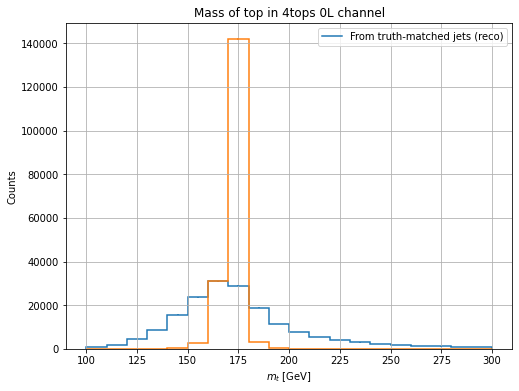

In [17]:
import mplhep as hep 
import boost_histogram as bh 
import matplotlib.pyplot as plt

hist_reco = bh.Histogram(bh.axis.Regular(20, 100,300))
hist_reco.fill(all_reco_tops.m[:,0])

hist_truth = bh.Histogram(bh.axis.Regular(20, 100, 300))
hist_truth.fill(all_truth_tops.m)

plt.figure(figsize=(8,6))
plt.grid()
hep.histplot([hist_reco, hist_truth])
plt.xlabel(r"$m_t$ [GeV]")
plt.ylabel(r"Counts")
plt.legend([r"From truth-matched jets (reco)"])
plt.title(r"Mass of top in 4tops 0L channel")
plt.show()

In [306]:
fm_location_of_p0 = np.where(mo[fully_matched]==0)[1]
fm_location_of_p4 = np.where(mo[fully_matched]==4)[1]
fm_location_of_p5 = np.where(mo[fully_matched]==5)[1]

fm_location_of_p1 = np.where(mo[fully_matched]==1)[1]
fm_location_of_p6 = np.where(mo[fully_matched]==6)[1]
fm_location_of_p7 = np.where(mo[fully_matched]==7)[1]

fm_location_of_p2 = np.where(mo[fully_matched]==2)[1]
fm_location_of_p8 = np.where(mo[fully_matched]==8)[1]
fm_location_of_p9 = np.where(mo[fully_matched]==9)[1]

fm_location_of_p3 = np.where(mo[fully_matched]==3)[1]
fm_location_of_p10 = np.where(mo[fully_matched]==10)[1]
fm_location_of_p11 = np.where(mo[fully_matched]==11)[1]


In [307]:
fm_p0_indices  = ak.from_regular(ak.Array(fm_location_of_p0[:, None]), axis=1)
fm_p1_indices  = ak.from_regular(ak.Array(fm_location_of_p1[:, None]), axis=1)
fm_p2_indices  = ak.from_regular(ak.Array(fm_location_of_p2[:, None]), axis=1)
fm_p3_indices  = ak.from_regular(ak.Array(fm_location_of_p3[:, None]), axis=1)
fm_p4_indices  = ak.from_regular(ak.Array(fm_location_of_p4[:, None]), axis=1)
fm_p5_indices  = ak.from_regular(ak.Array(fm_location_of_p5[:, None]), axis=1)
fm_p6_indices  = ak.from_regular(ak.Array(fm_location_of_p6[:, None]), axis=1)
fm_p7_indices  = ak.from_regular(ak.Array(fm_location_of_p7[:, None]), axis=1)
fm_p8_indices  = ak.from_regular(ak.Array(fm_location_of_p8[:, None]), axis=1)
fm_p9_indices  = ak.from_regular(ak.Array(fm_location_of_p9[:, None]), axis=1)
fm_p10_indices = ak.from_regular(ak.Array(fm_location_of_p10[:, None]), axis=1)
fm_p11_indices = ak.from_regular(ak.Array(fm_location_of_p11[:, None]), axis=1)

In [309]:
fm_reco_top1 = all_jets[fully_matched][fm_p0_indices] + all_jets[fully_matched][fm_p4_indices] + all_jets[fully_matched][fm_p5_indices]
fm_reco_top2 = all_jets[fully_matched][fm_p1_indices] + all_jets[fully_matched][fm_p6_indices] + all_jets[fully_matched][fm_p7_indices]
fm_reco_top3 = all_jets[fully_matched][fm_p2_indices] + all_jets[fully_matched][fm_p8_indices] + all_jets[fully_matched][fm_p9_indices]
fm_reco_top4 = all_jets[fully_matched][fm_p3_indices] + all_jets[fully_matched][fm_p10_indices] + all_jets[fully_matched][fm_p11_indices]

In [314]:
fm_truth_top1 = truth_objects[fully_matched][:,0] +  truth_objects[fully_matched][:,4] +  truth_objects[fully_matched][:,5]
fm_truth_top2 = truth_objects[fully_matched][:,1] +  truth_objects[fully_matched][:,6] +  truth_objects[fully_matched][:,7]
fm_truth_top3 = truth_objects[fully_matched][:,2] +  truth_objects[fully_matched][:,8] +  truth_objects[fully_matched][:,9]
fm_truth_top4 = truth_objects[fully_matched][:,3] +  truth_objects[fully_matched][:,10] +  truth_objects[fully_matched][:,11]

In [315]:
fm_reco_4top = fm_reco_top1+fm_reco_top2+fm_reco_top3+fm_reco_top4

In [316]:
fm_truth_4top = fm_truth_top1+fm_truth_top2+fm_truth_top3+fm_truth_top4

Text(0.5, 1.0, 'Mass of 4top system in 4tops 0L channel (fully-matched events)')

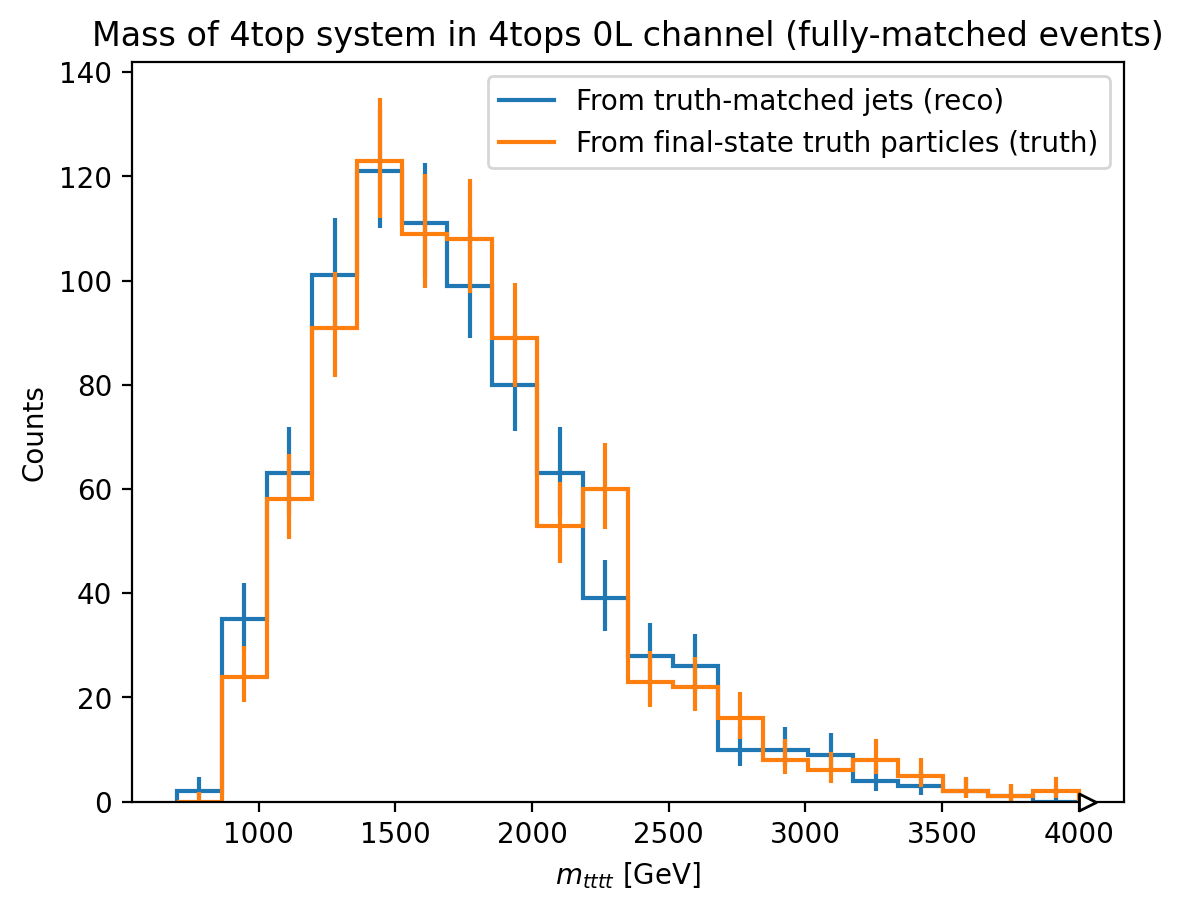

In [328]:
import mplhep as hep 
import boost_histogram as bh 
import matplotlib.pyplot as plt

hist_reco = bh.Histogram(bh.axis.Regular(20, 700,4000))
hist_reco.fill(fm_reco_4top.m[:,0])

hist_truth = bh.Histogram(bh.axis.Regular(20, 700, 4000))
hist_truth.fill(fm_truth_4top.m)

hep.histplot([hist_reco,hist_truth])
plt.xlabel(r"$m_{tttt}$ [GeV]")
plt.ylabel(r"Counts")
plt.legend([r"From truth-matched jets (reco)", "From final-state truth particles (truth)"])
plt.title(r"Mass of 4top system in 4tops 0L channel (fully-matched events)")